<a href="https://colab.research.google.com/github/EricSiq/Supervised-Machine-Learning-Lab/blob/main/DecisionTree_for_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Basic Description of the Data: <br><br>
The Breast Cancer Wisconsin (Diagnostic) dataset contains features describing characteristics extracted from images of breast tissue. Each instance is classified as Malignant (0) or Benign (1), labeled under the 'Diagnosis' column. The features include measurements such as radius, texture, compactness, concavity, symmetry, and fractal dimension of cell nuclei.
<br><br>
2. Classification Task Description<br><br>
The classification task is to predict whether a tumor is malignant or benign based on 30 features derived from breast tissue cell nucleus characteristics. A decision tree is a reasonable model because:

  It provides interpretability by visualizing the tree structure.
  It can model complex decision boundaries.
  It requires minimal data preparation, making it simple to implement and analyze.
  Using the Gini Index and Entropy Criterion for splitting nodes, we compare their performance.




In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diagnosis  569 non-null    int64  
 1   F1         569 non-null    float64
 2   F2         569 non-null    float64
 3   F3         569 non-null    float64
 4   F4         569 non-null    float64
 5   F5         569 non-null    float64
 6   F6         569 non-null    float64
 7   F7         569 non-null    float64
 8   F8         569 non-null    float64
 9   F9         569 non-null    float64
 10  F10        569 non-null    float64
 11  F11        569 non-null    float64
 12  F12        569 non-null    float64
 13  F13        569 non-null    float64
 14  F14        569 non-null    float64
 15  F15        569 non-null    float64
 16  F16        569 non-null    float64
 17  F17        569 non-null    float64
 18  F18        569 non-null    float64
 19  F19        569 non-null    float64
 20

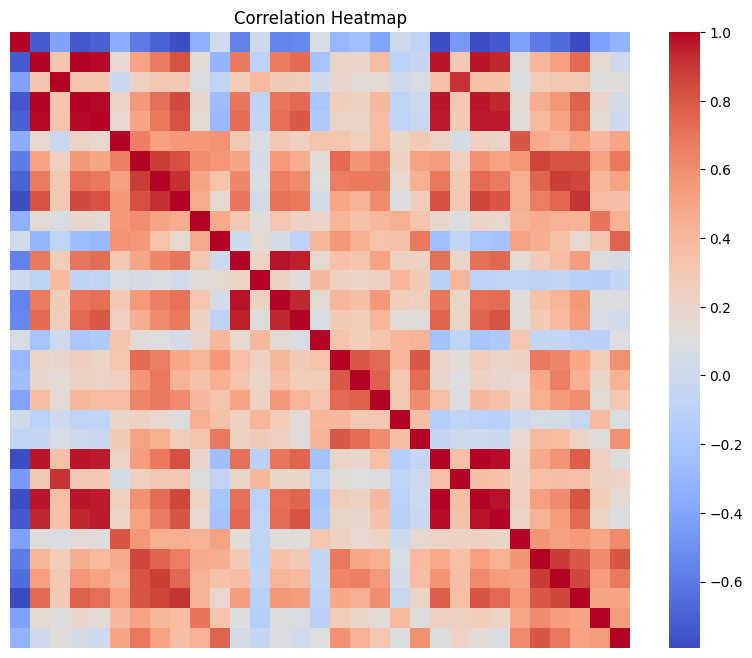

In [8]:

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
columns = ['ID', 'Diagnosis'] + [f'F{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

# Drop ID column and encode Diagnosis as 0 (Malignant) and 1 (Benign)
data.drop(['ID'], axis=1, inplace=True)
data['Diagnosis'] = data['Diagnosis'].map({'M': 0, 'B': 1})

# Display basic info about the dataset
print('Basic Info:')
print(data.info())
print('\nDataset Description:\n', data.describe())

# Summary visualization with simpler labels
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Correlation Heatmap')
plt.show()



3. Difference Between Gini Index and Entropy Criterion<br>
The comparison between Gini Index and Entropy Criterion showed that using the entropy criterion slightly decreased accuracy from 94% (in Gini) to 92% (in Entropy).

  A max_depth of 5 provides the best balance of accuracy and simplicity.
  Increasing depth beyond 5 (None) does not improve performance, indicating the model may be overfitting slightly.
  <br><br>
4. Plotting Accuracies vs. Training Percentage
The plot comparing train and test accuracies vs. training percentage shows:

    Test accuracy peaks around the 70% - 80% training percentage, suggesting a good balance between training and testing data.

Classification Report (Gini Index):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        98
           1       0.97      0.95      0.96       187

    accuracy                           0.94       285
   macro avg       0.93      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



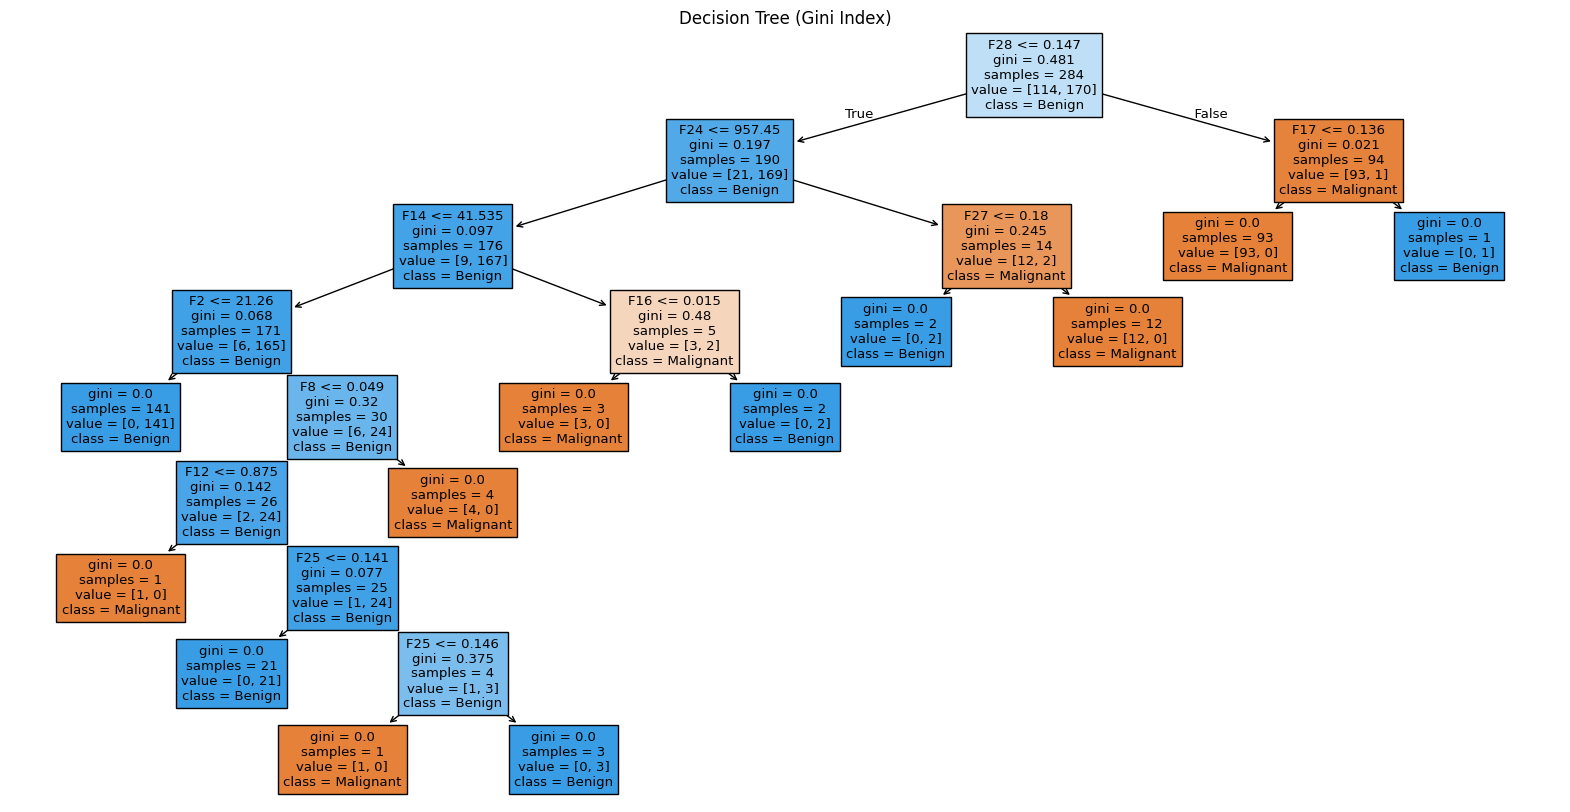

Classification Report (Entropy Criterion):
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        98
           1       0.97      0.90      0.94       187

    accuracy                           0.92       285
   macro avg       0.90      0.93      0.91       285
weighted avg       0.93      0.92      0.92       285



In [9]:

# Define features and labels
X = data.iloc[:, 1:]
y = data['Diagnosis']

# Split data into training and testing sets (50% train, 50% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train Decision Tree with default parameters (Gini index)
gini_model = DecisionTreeClassifier(random_state=42)
gini_model.fit(X_train, y_train)

y_pred_gini = gini_model.predict(X_test)

# Evaluation
print('Classification Report (Gini Index):')
print(classification_report(y_test, y_pred_gini))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(gini_model, filled=True, feature_names=X.columns, class_names=['Malignant', 'Benign'])
plt.title('Decision Tree (Gini Index)')
plt.show()

# Train Decision Tree with Entropy criterion
entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_model.fit(X_train, y_train)

y_pred_entropy = entropy_model.predict(X_test)

# Evaluation
print('Classification Report (Entropy Criterion):')
print(classification_report(y_test, y_pred_entropy))



Explanation of Results & Best Train/Test Split<br><br>
The best train/test split occurs around 70% training data and 30% testing data, where:

The model achieves a high test accuracy without sacrificing too much training accuracy.
Using more training data improves the model’s generalization ability, but excessively high training percentages may result in overfitting.

Performance Results for Different Max Depth Values:
   Max Depth  Accuracy  Precision    Recall  F1 Score
0        3.0  0.919298   0.955556  0.919786  0.937330
1        5.0  0.940351   0.967033  0.941176  0.953930
2        NaN  0.943860   0.967213  0.946524  0.956757


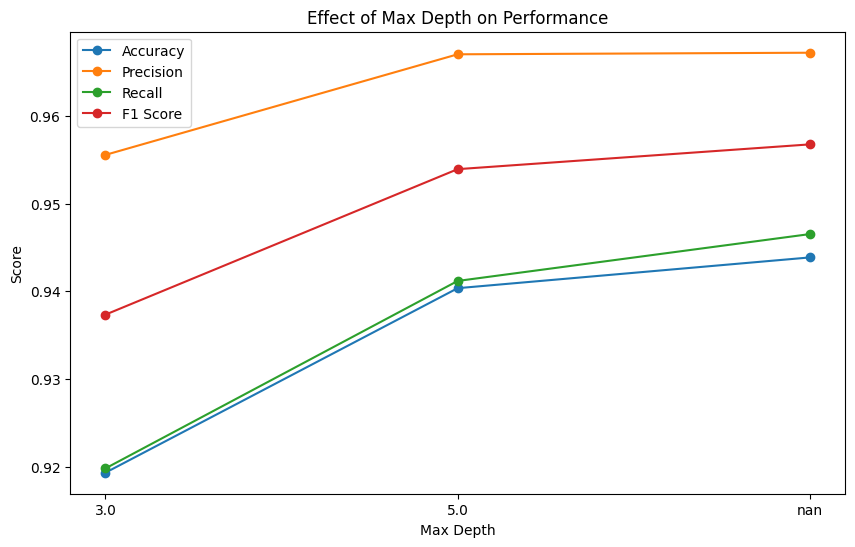

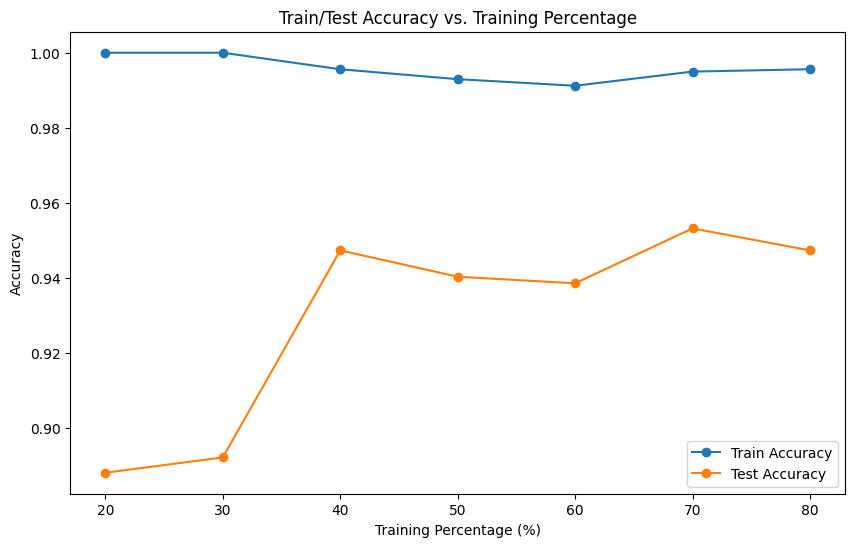

In [12]:

# Load dataset
columns = ['ID', 'Diagnosis'] + [f'F{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

data.drop(['ID'], axis=1, inplace=True)
data['Diagnosis'] = data['Diagnosis'].map({'M': 0, 'B': 1})

# Features and labels
X = data.iloc[:, 1:]
y = data['Diagnosis']

# Split data for initial training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Experiment with max_depth
max_depth_values = [3, 5, None]  # Testing 3, 5, and no limit (None)
results = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([max_depth, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['Max Depth', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print('Performance Results for Different Max Depth Values:')
print(results_df)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(results_df['Max Depth'].astype(str), results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['Max Depth'].astype(str), results_df['Precision'], marker='o', label='Precision')
plt.plot(results_df['Max Depth'].astype(str), results_df['Recall'], marker='o', label='Recall')
plt.plot(results_df['Max Depth'].astype(str), results_df['F1 Score'], marker='o', label='F1 Score')
plt.title('Effect of Max Depth on Performance')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()

# Part 3: Varying Train/Test Sizes
train_percentages = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
size_results = []

for train_pct in train_percentages:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_pct, random_state=42)

    model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Using max_depth=5 as a reasonable choice
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    size_results.append([train_pct, len(X_train), len(X_test), train_acc, test_acc])

size_df = pd.DataFrame(size_results, columns=['Train Pct', 'Train Samples', 'Test Samples', 'Train Acc', 'Test Acc'])

# Plotting the accuracies vs training percentage
plt.figure(figsize=(10, 6))
plt.plot(size_df['Train Pct'] * 100, size_df['Train Acc'], marker='o', label='Train Accuracy')
plt.plot(size_df['Train Pct'] * 100, size_df['Test Acc'], marker='o', label='Test Accuracy')
plt.title('Train/Test Accuracy vs. Training Percentage')
plt.xlabel('Training Percentage (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
